# Part II - Student's Perception of Control and Their Learning Behaviour
## by Daniel Oliveira

## Investigation Overview

In this investigation I wanted to understand how students' perception of control of math outcomes would influence thoughts and behaviour regarding his/her learning.

I've learned that when the perception of control of their outcomes is higher, it's more frequent to see behaviour and thoughts torwards school and learning engagement. But when it comes to "blaming" the teacher for the student's effort in learning it seems to have the opposite effect.


## Dataset Overview

This dataset contains answers regarding a survey of around 15 year-old students' skills and knowledge, with around 510,000 students in 65 economies. Due to data wrangling, only answers from 427386 students were used, all of them born in the country of the survey.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_pisa = pd.read_csv('pisa2012.csv', encoding = 'latin-1', dtype = 'unicode')

In [3]:
# All data wrangling performed in part 1
df_pisa = df_pisa[df_pisa['ST01Q01'] != '96']
df_pisa = df_pisa.dropna(subset = ['ST06Q01'])
df_pisa.drop(df_pisa[df_pisa.ST21Q01.isin(['4', '3', '13', '10', '5', '0', '6', '9', '2', '15', '12',\
                                           '1', '14', '8', '7', '11', '16'])].index, inplace = True)
df_pisa.shape

(427386, 636)

In [4]:
# Change dtypes - function
def generate_cat(columns_list, cat_list, df = df_pisa):
    """
    This function will change the dtype of a column to categorical
    
    Parameters:
        columns_list = a list of pandas DataFrame series (just column names) that we want to change to categorical dtype
        cat_list = a list of the variables within the series, already ordered
        df = dataframe used (in this case, always df_pisa)
    """
    for series in columns_list:
        classes = pd.api.types.CategoricalDtype(ordered = True, categories = cat_list)
        df[series] = df[series].astype(classes)

In [5]:
# Change dtypes
agreement_options = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
truancy_options = ['1', '2', '3', '4']
questions_control = ['ST43Q01', 'ST43Q02', 'ST43Q03', 'ST43Q04', 'ST43Q05', 'ST43Q06']
questions_ethics = ['ST46Q01', 'ST46Q02', 'ST46Q03', 'ST46Q04', 'ST46Q05', 'ST46Q06', 'ST46Q07', 'ST46Q08', 'ST46Q09']
questions_truancy = ['ST115Q01']

generate_cat(questions_control, agreement_options)
generate_cat(questions_ethics, agreement_options)
generate_cat(questions_truancy, truancy_options)
df_pisa['ST06Q01'] = df_pisa['ST06Q01'].str.extract('(\d+)').astype(int)

In [7]:
# Create necessary distributions - function
def bar_chart(series_name, df = df_pisa):
    """
    This function will generate a bar chart of proportion of counts of a certain Pandas series
    
    Parameters:
        series_name = name of the column
        df = Pandas dataframe used (which is always df_pisa in this case)
    """
    sb.countplot(data = df, x = series_name, color = sb.color_palette()[0])
    n_values = df[series_name].value_counts().sum()
    max_count = df[series_name].value_counts()[0]
    max_prop = max_count / n_values
    tick_props = np.arange(0, max_prop, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    plt.yticks(tick_props * n_values, tick_names)
    plt.ylabel('Proportion')
    plt.xlabel('Answers')
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = df[series_name].value_counts()[label.get_text()]
        pct_string = '{:0.1f}%'.format(100 * count / df[series_name].value_counts().sum())
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    ;

In [14]:
# Create necessary heatmaps - function
def heatmap(column_x, column_y, df = df_pisa):
    """
    This function returns a heatmap
    Parameters:
        column_x = name of the column that will be in the x axis
        column_y = name of the column that will be in the y axis
        df = dataframe used (df_pisa by default for this analysis)
        """
    var = df.groupby([column_y, column_x]).size()
    var = var.reset_index(name='count')
    var = var.pivot(index = column_y, columns = column_x, values = 'count')
    sb.heatmap(var, annot = True, fmt = 'd', cmap = 'viridis_r');

## Distribution of Student's Perception of Control of Outcomes

Most students say that their outcomes in mathematics is entirely up to them. In fact, around 85% agree with this.
But when asked if their teachers would make a difference regarding their own effort in learning, the percentage of students who don't agree with this is around 60%.

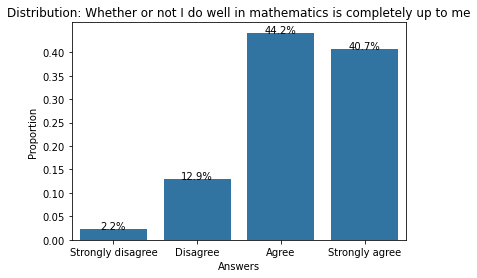

In [8]:
bar_chart('ST43Q02')
plt.title('Distribution: Whether or not I do well in mathematics is completely up to me');

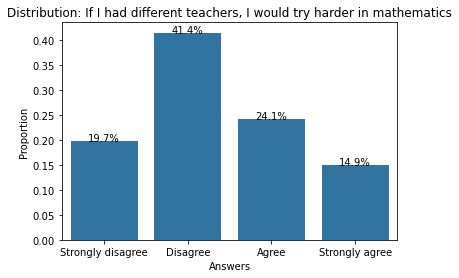

In [13]:
bar_chart('ST43Q04')
plt.title('Distribution: If I had different teachers, I would try harder in mathematics');

## Distribution of Students' Math Work Ethic

There are more students that agree that they study hard for math quizzes, but more than 40% don't say the same, so it's almost even.

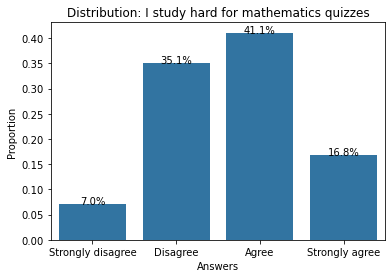

In [12]:
bar_chart('ST46Q04')
plt.title('Distribution: I study hard for mathematics quizzes');

## Perception of Control of Outcomes (General) vs Math Work Ethic

Students that believe it's up to them to get good results in mathematics tend to report more that they study hard for their quizzes.

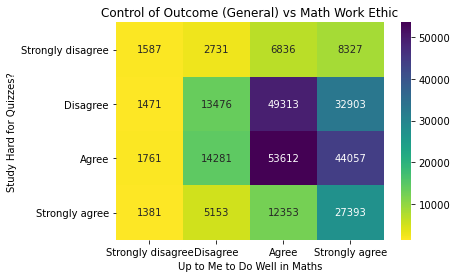

In [21]:
heatmap('ST43Q02', 'ST46Q04')
plt.ylabel('Study Hard for Quizzes?')
plt.xlabel('Up to Me to Do Well in Maths')
plt.title('Control of Outcome (General) vs Math Work Ethic');

## Perception of Control of Outcomes (Teacher Role) vs Math Work Ethic

But students that report NOT studying hard for quizzes more frequently say that changing teachers wouldn't make a difference in their effort.

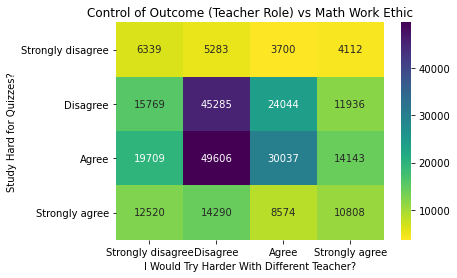

In [22]:
heatmap('ST43Q04', 'ST46Q04')
plt.ylabel('Study Hard for Quizzes?')
plt.xlabel('I Would Try Harder With Different Teacher?')
plt.title('Control of Outcome (Teacher Role) vs Math Work Ethic');

## Perception of Control of Outcomes (Teacher Role) vs Math Work Ethic

With the teacher's role seemingly very important, we noted that truancy would only make a difference on student's math work ethic when the perception of this role by the teacher (in terms of their own outcomes) remains the same.
With that, we can see that student's that report not studying hard for math quizzes have also skipped more classes.

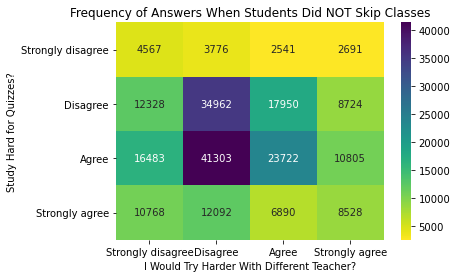

In [26]:
df_pisa_temp = df_pisa[df_pisa['ST115Q01'] == '1']
sb.heatmap(df_pisa_temp.groupby(['ST46Q04', 'ST43Q04']).size().unstack(), annot = True, fmt = '.0f', cmap = 'viridis_r')
plt.title('Frequency of Answers When Students Did NOT Skip Classes')
plt.ylabel('Study Hard for Quizzes?')
plt.xlabel('I Would Try Harder With Different Teacher?');

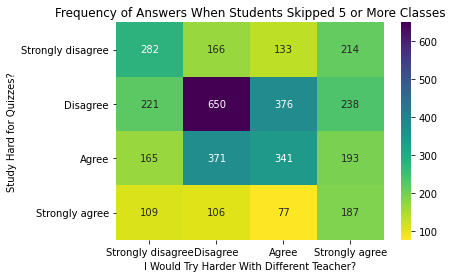

In [27]:
df_pisa_temp = df_pisa[df_pisa['ST115Q01'] == '4']
sb.heatmap(df_pisa_temp.groupby(['ST46Q04', 'ST43Q04']).size().unstack(), annot = True, fmt = '.0f', cmap = 'viridis_r')
plt.title('Frequency of Answers When Students Skipped 5 or More Classes')
plt.ylabel('Study Hard for Quizzes?')
plt.xlabel('I Would Try Harder With Different Teacher?');

In [3]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 749822 bytes to Part_II_slide_deck_template.slides.html
